# Spring 2019 Statistical NLP, UCSD
Programming Assignment 2: Text Classification <br>


In [58]:
import sentiment as sentimentinterface
import classify 
import timeit
import numpy as np

import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
%matplotlib inline

## 1. Inspect the Feature representation

In [59]:
print("Reading data")
tarfname = "data/sentiment.tar.gz"
sentiment = sentimentinterface.read_files(tarfname)
    

Reading data
-- train data
sentiment/train.tsv
4582
-- dev data
sentiment/dev.tsv
458
-- transforming data and labels
(4582, 15000)


In [32]:
array = sentiment.trainX # the vocabulary dictionary and return term-document matrix
print(sentiment.train_data[0]) # the first entry in training data
X = sentiment.trainX # term-document matrix; 
#print(X.toarray().shape) #X : array, [n_samples, n_features]
print('~'*50)
print(sentiment.tfidf_vect.inverse_transform(X)[0]) # Return terms with nonzero entries in X[0].
X_arr = X.toarray()
print(X)
print("hello", len(X_arr[1]))

Went last night for the first time with my boyfriend. Let me start off by saying I'm vegetarian, but my boyfriend is not. I ordered the chicken v mushroom, it
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['with my' 'with' 'went last' 'went' 'vegetarian' 'time with my'
 'time with' 'time' 'the first time' 'the first' 'the chicken' 'the'
 'start off by' 'start off' 'start' 'saying' 'ordered the' 'ordered'
 'off by saying' 'off by' 'off' 'not' 'night for' 'night' 'my boyfriend'
 'my' 'mushroom' 'me start off' 'me start' 'me' 'let me start' 'let me'
 'let' 'last night for' 'last night' 'last' 'it' 'is not' 'is'
 'for the first' 'for the' 'for' 'first time' 'first' 'chicken'
 'by saying vegetarian' 'by saying' 'by' 'but my boyfriend' 'but my' 'but'
 'boyfriend is' 'boyfriend']
  (0, 14673)	0.127726229698
  (0, 14644)	0.066510233045
  (0, 14369)	0.19548335381
  (0, 14349)	0.0898400316439
  (0, 13360)	0.154054021343
  (0, 12133)	0.19548335381
  (0, 12132)	0.178638269705
  (0, 12084)	0.0

In [4]:
print((sentiment.tfidf_vect.get_feature_names()[6150])) # map id to word
print((sentiment.tfidf_vect.get_feature_names()[1791]))


it came highly
boyfriend and


# 2. Inspect the label representation

In [5]:
print('target labels ', sentiment.target_labels)
print('target labels ', sentiment.trainy[:5]) # show the labels of the first 5 training examples
print(list(sentiment.le.classes_))
print(list(sentiment.le.transform(['NEGATIVE', 'POSITIVE'])))
print(list(sentiment.le.inverse_transform(list(sentiment.trainy[:5]))))


target labels  ['NEGATIVE' 'POSITIVE']
target labels  [1 1 0 0 1]
['NEGATIVE', 'POSITIVE']
[0, 1]
['POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE']


# 3. Take a look at the data

Went last night for the first time with my boyfriend. Let me start off by saying I'm vegetarian, but my boyfriend is not. I ordered the chicken v mushroom, it


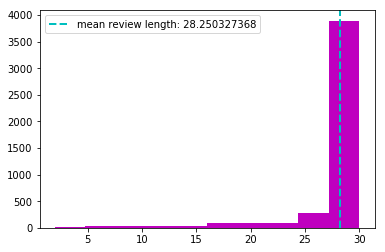

In [6]:
print(sentiment.train_data[0])

lens = []
for review in sentiment.train_data:
    lens.append(len(review.split()))
plt.hist(lens, color='m')
plt.axvline(np.mean(lens), color='c', linestyle='dashed', linewidth=2,label='mean review length: '+str(np.mean(lens)))
plt.legend()
plt.show()

# 4. Train the classifier

In [33]:
cls = classify.train_classifier(sentiment.trainX, sentiment.trainy)

# 5. What are the decisive features

In [69]:
coefficients=cls.coef_[0]
k = 8
top_k =np.argsort(coefficients)[-k:]
print(top_k)
top_k_words = []

print('-'*50)
print('Top k=%d' %k)
print('-'*50)

for i in top_k:
    print(sentiment.tfidf_vect.get_feature_names()[i])
    top_k_words.append(sentiment.tfidf_vect.get_feature_names()[i])
#print(sentiment.count_ve
print('-'*50)
print('Bottom k=%d' %k)
print('-'*50)
#top_k = np.argpartition(coefficients, -k)[-k:]
bottom_k =np.argsort(coefficients)[:k]
print(bottom_k)
bottom_k_words = []
#print(top_k)
for i in bottom_k:
    print(sentiment.tfidf_vect.get_feature_names()[i])
    bottom_k_words.append(sentiment.tfidf_vect.get_feature_names()[i])

#print(sentiment.count_ve

[11168  1234  3744  1521  3221  7108   439  4750]
--------------------------------------------------
Top k=8
--------------------------------------------------
the best
awesome
excellent
best
delicious
love
amazing
great
--------------------------------------------------
Bottom k=8
--------------------------------------------------
[ 7953  5353 14766  9913 11001 11704  1280 14349]
not
horrible
worst
rude
terrible
the worst
bad
went


# 6. How is the classifier doing edge cases

## 6 a) reviews that contain top-k words
 in this case we expect predictions to be mostly POSITIVE (i.e LABEL=1)


  Accuracy on these reviews  is: 0.857142857143


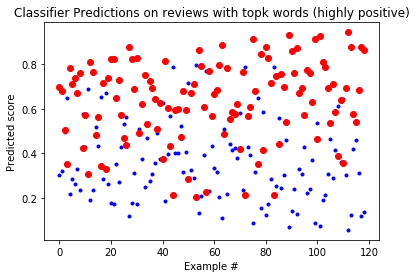

In [67]:
top_k_reviews = []
top_k_labels = []
for j in range(len(sentiment.dev_data)):
    review = sentiment.dev_data[j]
    for word in top_k_words:
        if word in review:
            top_k_reviews.append(review)
            top_k_labels.append(sentiment.dev_labels[j])
            break
    
        #print(review)
dev_X = sentiment.tfidf_vect.transform(top_k_reviews)
classify.evaluate(dev_X, sentiment.le.transform(top_k_labels), cls , 'these reviews')


yp = cls.predict_proba(dev_X) 
#print(yp.shape)
plt.plot(yp[:,0],'b.') # ['0: NEGATIVE', '1:POSITIVE'] 
plt.plot(yp[:,1],'ro') 
plt.title('Classifier Predictions on reviews with topk words (highly positive)')
plt.ylabel('Predicted score')
plt.xlabel('Example #')
plt.show()

## 6b) reviews that contain bottom-k words
 in this case we expect predictions to be mostly NEGATIVE (i.e LABEL=0)

  Accuracy on these reviews  is: 0.851351351351


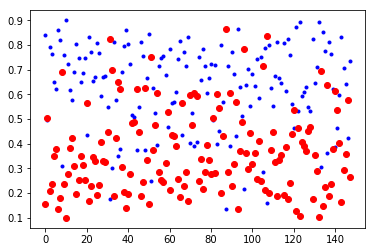

In [68]:
bottom_k_reviews = []
bottom_k_labels = []
for j in range(len(sentiment.dev_data)):
    review = sentiment.dev_data[j]
    for word in bottom_k_words:
        if word in review:
            bottom_k_reviews.append(review)
            bottom_k_labels.append(sentiment.dev_labels[j])
            break
    
        #print(review)
dev_X = sentiment.tfidf_vect.transform(bottom_k_reviews)
classify.evaluate(dev_X, sentiment.le.transform(bottom_k_labels), cls, 'these reviews')
yp = cls.predict_proba(dev_X) 
#print(yp.shape)
plt.plot(yp[:,0],'b.') # ['0: NEGATIVE', '1:POSITIVE'] 
plt.plot(yp[:,1],'ro') 
plt.show()

In [31]:
from nltk.corpus import opinion_lexicon

In [25]:
print(opinion_lexicon.words)

<bound method OpinionLexiconCorpusReader.words of <OpinionLexiconCorpusReader in '/Users/shivarkannan/nltk_data/corpora/opinion_lexicon'>>


In [27]:
import nltk.corpus.reader.opinion_lexicon as op

In [32]:
obj = op.OpinionLexiconCorpusReader()

TypeError: __init__() missing 2 required positional arguments: 'root' and 'fileids'

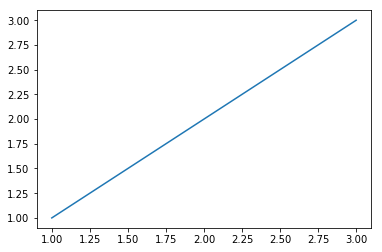

In [34]:
plt.plot([1,2,3],[1,2,3])
plt.show()

In [61]:
import classify
import numpy as np
from sklearn.utils import shuffle
cls_2 = classify.train_classifier(sentiment.trainX,sentiment.trainy) # initial train with 0 unlabelled predicted
factor = 8000 # roughly about 10% of the corpus

#  print(type(sentiment.trainX))
#  print(type(sentiment.trainy))
unlabeled = sentimentinterface.read_unlabeled(tarfname, sentiment)
unlabeled.data_temp = unlabeled.data

for i in range(12):


    end_index = min(len(unlabeled.data),(i*factor) + factor)
    partition = unlabeled.data_temp[i*factor:end_index] # create partition of data
    #partition_matrix = sentiment.tfidf_vect.transform(partition) # create tfidf features on corpus
    partition_matrix = unlabeled.X[i*factor:end_index]
    yp = cls_2.predict(partition_matrix) # predict on this partition of unseen data to create labels
    decisions = cls_2.decision_function(partition_matrix)
    # predict on unseen portion of data
    #for j in range(len(decisions)):
    #    print(decisions[j])
    #print(decisions)
    #print(decisions)
    # append this data to the train to create new train with labels
    for j in range(len(partition)):
        # check the confidence on each prediction before appending
        if(abs(decisions[j]) > 3.5):
            #print("HI")
        # print(partition[j])
        # print(yp[j])
            sentiment.train_data.append(partition[j])

            sentiment.trainy = np.append(sentiment.trainy,yp[j])
    print(len(sentiment.train_data))
    print(sentiment.trainy.shape)
    sentiment.trainX = sentiment.tfidf_vect.transform(sentiment.train_data) # transform new training data with partition addition
    cls_2 = classify.train_classifier(sentiment.trainX,sentiment.trainy) # train a new classifier
    classify.evaluate(sentiment.devX, sentiment.devy, cls_2, 'dev') # evaluate on dev portion


sentiment/unlabeled.tsv
(91524, 15000)
4583
(4583,)
  Accuracy on dev  is: 0.810043668122
4584
(4584,)
  Accuracy on dev  is: 0.810043668122
4585
(4585,)
  Accuracy on dev  is: 0.810043668122
4588
(4588,)
  Accuracy on dev  is: 0.810043668122
4589
(4589,)
  Accuracy on dev  is: 0.810043668122
4591
(4591,)
  Accuracy on dev  is: 0.810043668122
4593
(4593,)
  Accuracy on dev  is: 0.810043668122
4593
(4593,)
  Accuracy on dev  is: 0.810043668122
4593
(4593,)
  Accuracy on dev  is: 0.810043668122
4593
(4593,)
  Accuracy on dev  is: 0.810043668122
4594
(4594,)
  Accuracy on dev  is: 0.810043668122
4594
(4594,)
  Accuracy on dev  is: 0.810043668122


In [70]:
supervised_predictions = cls.predict(unlabeled.X)
semi_supervised_predictions = cls_2.predict(unlabeled.X)

In [71]:
for i in range(len(supervised_predictions)):
    if(supervised_predictions[i] != semi_supervised_predictions[i]):
        print("supervised prediction: ", supervised_predictions[i])
        print("semi-supervised prediction: ", semi_supervised_predictions[i])
        print("data: ", unlabeled.data[i])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)


In [1]:
    coefficients=cls.coef_[0]
    k = 8
    top_k =np.argsort(coefficients)[-k:]
    print(top_k)
    top_k_words = []

    print('-'*50)
    print('Top k=%d' %k)
    print('-'*50)

    for i in top_k:
        print(sentiment.tfidf_vect.get_feature_names()[i])
        top_k_words.append(sentiment.tfidf_vect.get_feature_names()[i])
    #print(sentiment.count_ve
    print('-'*50)
    print('Bottom k=%d' %k)
    print('-'*50)
    #top_k = np.argpartition(coefficients, -k)[-k:]
    bottom_k =np.argsort(coefficients)[:k]
    print(bottom_k)
    bottom_k_words = []
    #print(top_k)
    for i in bottom_k:
        print(sentiment.tfidf_vect.get_feature_names()[i])
        bottom_k_words.append(sentiment.tfidf_vect.get_feature_names()[i])
    
    top_k_reviews = []
    top_k_labels = []
    for j in range(len(sentiment.dev_data)):
        review = sentiment.dev_data[j]
        for word in top_k_words:
            if word in review:
                top_k_reviews.append(review)
                top_k_labels.append(sentiment.dev_labels[j])
                break
        
            #print(review)
    dev_X = sentiment.tfidf_vect.transform(top_k_reviews)
    classify.evaluate(dev_X, sentiment.le.transform(top_k_labels), cls , 'these reviews')


    yp = cls.predict_proba(dev_X) 
    #print(yp.shape)
    plt.plot(yp[:,0],'b.') # ['0: NEGATIVE', '1:POSITIVE'] 
    plt.plot(yp[:,1],'ro') 
    plt.title('Classifier Predictions on reviews with topk words (highly positive)')
    plt.ylabel('Predicted score')
    plt.xlabel('Example #')
    plt.show()
    end_preds = cls.predict(unlabeled.X)
    for i in range(len(initial_preds)):
        if(initial_preds[i] != end_preds[i]):
            print("supervised prediction:", initial_preds[i])
            print("semi-supervised predicition:", end_preds[i])
            print("data:", unlabeled.data[i])

NameError: name 'cls' is not defined

In [27]:
import csv
array_of_points = []
with open('gender-classifier-DFE-791531.csv',encoding="utf-8",errors="ignore") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    print(csv_reader)
    line_count = 0
    num_use = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            #print(row[5])
            if(row[5] == 'female' or row[5] == 'male'):
                if(row[5] == 'female'):
                    string = ["POSITIVE",row[19]]
                else:
                    string = ["NEGATIVE",row[19]]
                array_of_points.append(string)
            #print(row[19])
            line_count += 1
    print(f'Processed {line_count} lines.')
    print(line_count)
    print(num_use)

Column names are _unit_id, _golden, _unit_state, _trusted_judgments, _last_judgment_at, gender, gender:confidence, profile_yn, profile_yn:confidence, created, description, fav_number, gender_gold, link_color, name, profile_yn_gold, profileimage, retweet_count, sidebar_color, text, tweet_coord, tweet_count, tweet_created, tweet_id, tweet_location, user_timezone
Processed 20051 lines.
20051
0


In [42]:
with open('train.tsv', 'w') as train_file:
    with open('dev.tsv', 'w') as dev_file:
        with open('unlabeled.tsv', 'w') as test_file:
            for i in range(len(array_of_points)):
                label = array_of_points[i][0]
                text = array_of_points[i][1]
                text = text.replace("\n","")
                if(i < 6000):
                    string = label + "\t" + text
                    train_file.write(string)
                    train_file.write("\n")
                elif(i >= 6000 and i < 10000):
                    string = label + "\t" + text
                    dev_file.write(string)
                    dev_file.write("\n")
                else:
                    string = text
                    test_file.write(string)
                    test_file.write("\n")
            

In [32]:
string = "hello" +"\t" +"world"
print(string)

hello	world
